# Figure 1, part 2

Removed splicing events in genes with TPM < 1 in Notebook `1.1 Supplementary Figure 1`.

In [1]:
from collections import defaultdict

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline


import flotilla
sns.set(style='ticks', context='talk')

folder = 'figures'

flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects/'

study = flotilla.embark('singlecell_pnm_figure1_supplementary_post_splicing_filtering', flotilla_dir=flotilla_dir)

/home/obotvinnik/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:810: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/obotvinnik/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())
/home/obotvinnik/anaconda/lib/python2.7/site-packages/flotilla/__init__.py:65: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  load_species_data=load_species_data)


2016-08-26 17:02:47	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure1_supplementary_post_splicing_filtering/datapackage.json
2016-08-26 17:02:47	Parsing datapackage to create a Study object
https://s3-us-west-2.amazonaws.com/flotilla-projects/ercc/ERCC_Controls.txt has not been downloaded before.
2016-08-26 17:03:24 	Initializing Study
2016-08-26 17:03:24 	Initializing Predictor configuration manager for Study
2016-08-26 17:03:24	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2016-08-26 17:03:24	Added ExtraTreesClassifier to default predictors
2016-08-26 17:03:24	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2016-08-26 17:03:24	Added ExtraTreesRegressor to default predictors
2016-08-26 17:03:24	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2016-08-26 17:03:24	Added Grad

Error loading species hg19 data: HTTP Error 404: Not Found

In [2]:
study.expression.data.head()

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,ENSG00000001461,...,ENSGR0000185960,ENSGR0000197976,ENSGR0000198223,ENSGR0000205755,ENSGR0000214717,ENSGR0000223511,ENSGR0000226179,ENSGR0000236017,ENSGR0000236871,ENSGR0000270726
CVN_01,9.583297,0,3.691144,0.000000,0.000000,2.748821,0,1.722466,0,0.000000,...,0.080647,0.291587,1.017003,0.080984,6.998972,0.153573,0.119524,0.663759,0.000000,2.905205
CVN_02,5.338678,0,0.000000,0.000000,0.113387,0.000000,0,0.503710,0,1.451580,...,0.495262,0.000000,0.568696,0.000000,0.000000,0.000000,0.116144,0.000000,0.087565,3.746504
CVN_03,0.146438,0,0.000000,1.262223,0.000000,0.000000,0,0.291712,0,0.000000,...,0.000000,0.000000,0.330164,0.263555,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CVN_04,8.422662,0,2.593897,0.000000,0.000000,6.688600,0,8.181010,0,1.155126,...,0.562974,0.000000,0.223287,0.140263,0.195424,0.000000,1.601383,0.000000,0.205765,1.533982
CVN_05,7.531459,0,5.124018,0.262705,4.346173,0.397903,0,6.262296,0,0.614197,...,0.353069,0.000000,0.646603,0.260183,6.631383,0.000000,0.096939,0.166200,0.133075,0.553417


In [3]:
study.expression.data.shape

(214, 18594)

In [4]:
event = 'exon:chr10:1043148-1043248:+@exon:chr10:1044943-1045035:+@exon:chr10:1046617-1046808:+'

event in study.splicing.data

False

In [5]:
# study.metadata._phenotype_to_color = {u'MN': u'#228a44',
#                                      u'NPC': u'#73c476',
#                                      u'iPSC': u'#c7e9c0'}

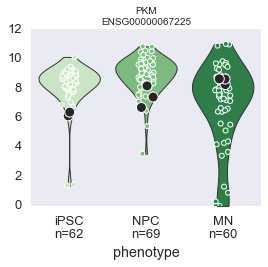

In [6]:
with sns.axes_style('dark'):
    study.plot_gene('PKM', sample_subset='~outlier')
    fig = plt.gcf()
    for ax in fig.axes:
        ax.set(ylim=(0, 12))
    fig.savefig('{}/pkm_violin.pdf'.format(folder))

### Number of splicing events in non-differentially expressed genes

In [7]:
from flotilla.compute.expression import differential_expression


In [8]:
singles_not_outliers = study.expression.singles.loc[~study.expression.singles.index.isin(study.expression.outlier_samples)]
singles_not_outliers.head()

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,ENSG00000001461,...,ENSGR0000185960,ENSGR0000197976,ENSGR0000198223,ENSGR0000205755,ENSGR0000214717,ENSGR0000223511,ENSGR0000226179,ENSGR0000236017,ENSGR0000236871,ENSGR0000270726
CVN_01,9.583297,0,3.691144,0.000000,0.000000,2.748821,0,1.722466,0,0.000000,...,0.080647,0.291587,1.017003,0.080984,6.998972,0.153573,0.119524,0.663759,0.000000,2.905205
CVN_02,5.338678,0,0.000000,0.000000,0.113387,0.000000,0,0.503710,0,1.451580,...,0.495262,0.000000,0.568696,0.000000,0.000000,0.000000,0.116144,0.000000,0.087565,3.746504
CVN_03,0.146438,0,0.000000,1.262223,0.000000,0.000000,0,0.291712,0,0.000000,...,0.000000,0.000000,0.330164,0.263555,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CVN_04,8.422662,0,2.593897,0.000000,0.000000,6.688600,0,8.181010,0,1.155126,...,0.562974,0.000000,0.223287,0.140263,0.195424,0.000000,1.601383,0.000000,0.205765,1.533982
CVN_05,7.531459,0,5.124018,0.262705,4.346173,0.397903,0,6.262296,0,0.614197,...,0.353069,0.000000,0.646603,0.260183,6.631383,0.000000,0.096939,0.166200,0.133075,0.553417


In [9]:
differential_results = differential_expression(singles_not_outliers, groupby=study.sample_id_to_phenotype)

/home/obotvinnik/anaconda/lib/python2.7/site-packages/flotilla/compute/expression.py:241: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  de_results = de_results.sort('bonferonni_p_value')


In [10]:
differential_results.head()

,gene_id,U_statistic,p_value,bonferonni_p_value
0,ENSG00000234273,180.609954,6.040138e-40,1.123103e-35
1,ENSG00000258417,180.609954,6.040138e-40,1.123103e-35
2,ENSG00000167600,180.609954,6.040138e-40,1.123103e-35
3,ENSG00000249152,180.609954,6.040138e-40,1.123103e-35
4,ENSG00000136110,178.790459,1.500186e-39,2.789447e-35


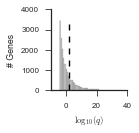

In [11]:
differential_results['log10_bonferonni_p_value'] = -np.log10(differential_results.bonferonni_p_value)

log_p_cutoff = 2

sns.set(style='ticks', context='paper')
fig, ax = plt.subplots(figsize=(2, 2))
# plt.yscale('log', nonposy='clip')

sns.distplot(differential_results['log10_bonferonni_p_value'], color='grey', kde=False)
ymin, ymax = ax.get_ylim()
ax.locator_params(nbins=4)

ax.vlines(log_p_cutoff, ymin, ymax, linestyle='--')
ax.set(ylabel='# Genes', xlabel='$\log_{10}(q)$')
sns.despine()

fig.tight_layout()
fig.savefig('{}/differential_expression_kruskal_wallis_bonferonni_p_value_cutoff.pdf'.format(folder))

In [12]:
non_de_genes = differential_results.gene_id.loc[differential_results.log10_bonferonni_p_value <= log_p_cutoff]
len(non_de_genes)

13634

### PCA of constitutively expressed genes

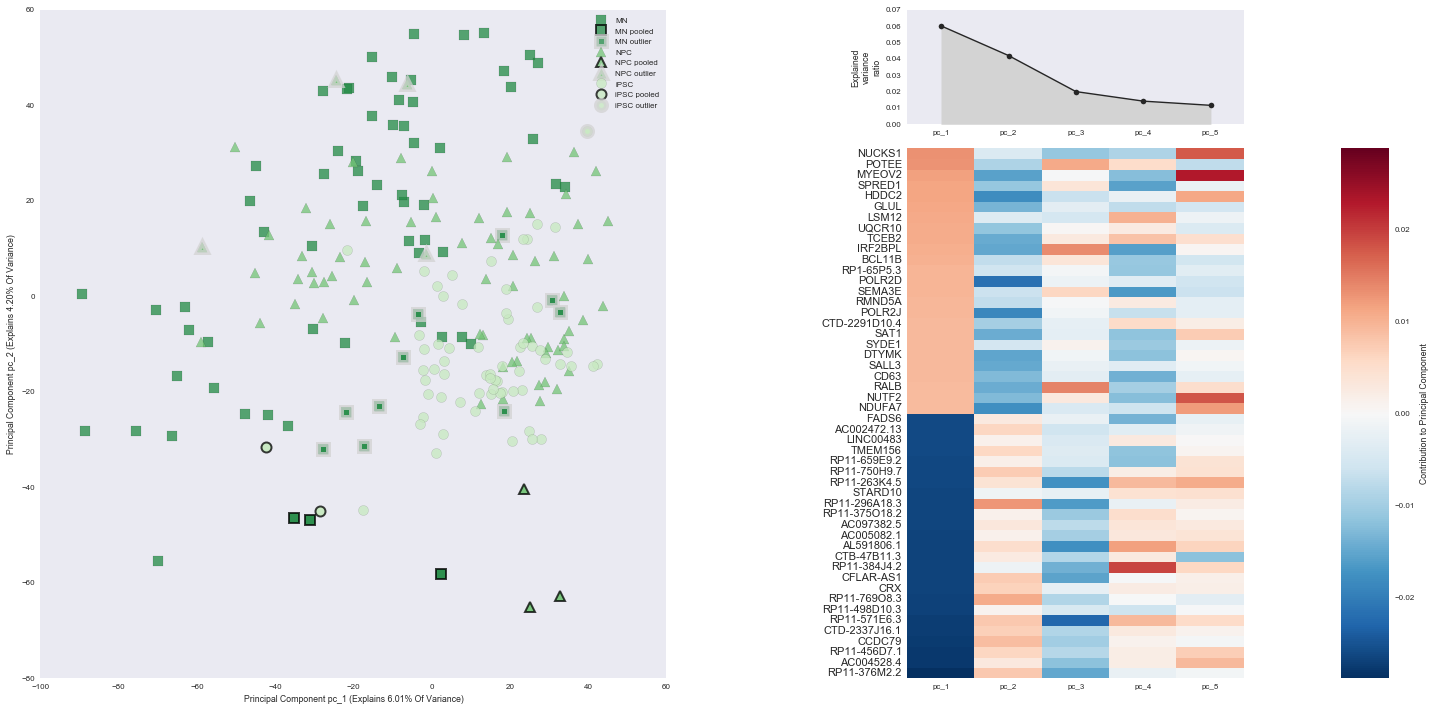

In [13]:
sns.set(style='dark', context='paper')
pcaviz = study.plot_pca(feature_subset=non_de_genes, show_vectors=False)
pcaviz.fig_reduced.savefig('{}/constitutively_expressed_genes_expression_pca.pdf'.format(folder))

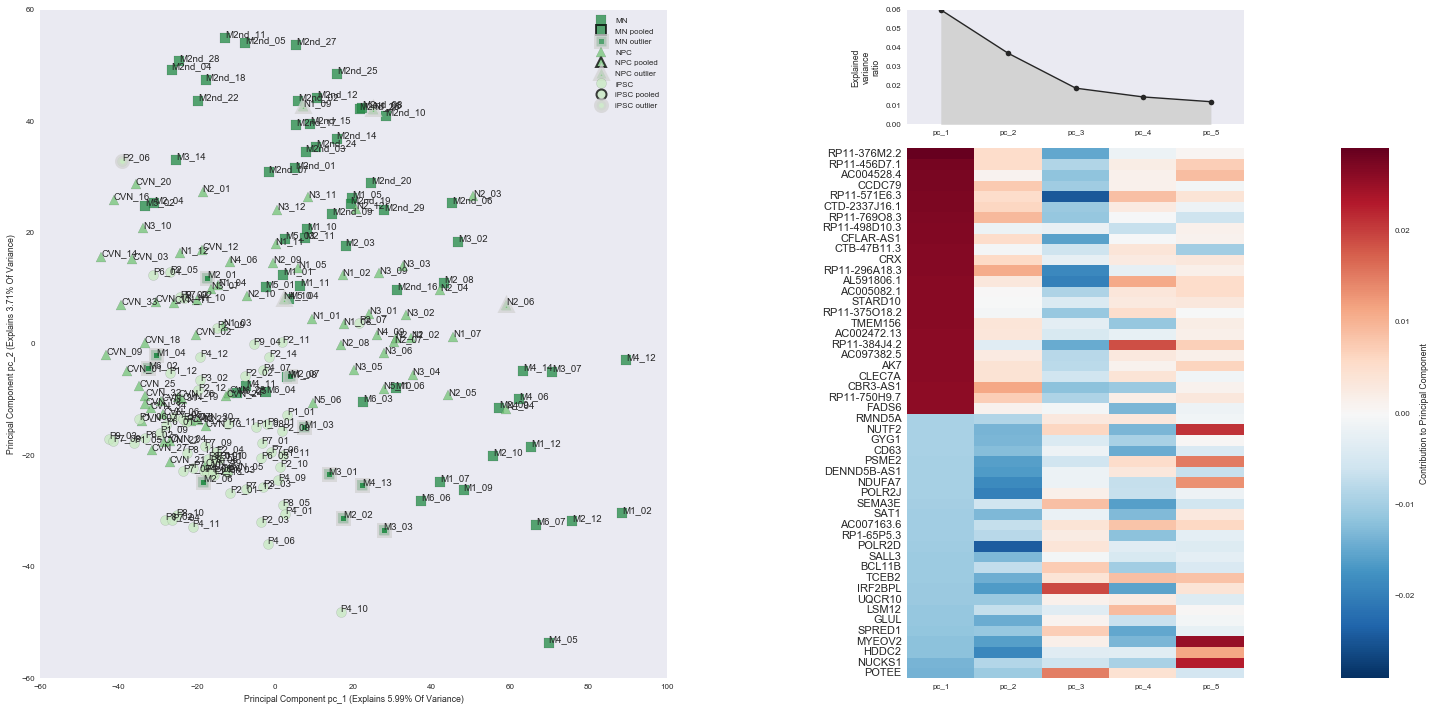

In [14]:
sns.set(style='dark', context='paper')
pcaviz = study.plot_pca(feature_subset=non_de_genes, show_vectors=False, show_point_labels=True, sample_subset='~pooled')

### PCA of constitutively expressed splicing events

### Get the splicing events

In [15]:
non_de_event_names = study.splicing.expression_to_splicing_id(non_de_genes)

### Plot PCA

In [16]:
study.metadata.data.columns

Index([u'single', u'pooled', u'phenotype', u'neuron', u'progenitor',
       u'stressed', u'craig_venter', u'differentiation_batch', u'split',
       u'outlier'],
      dtype='object')

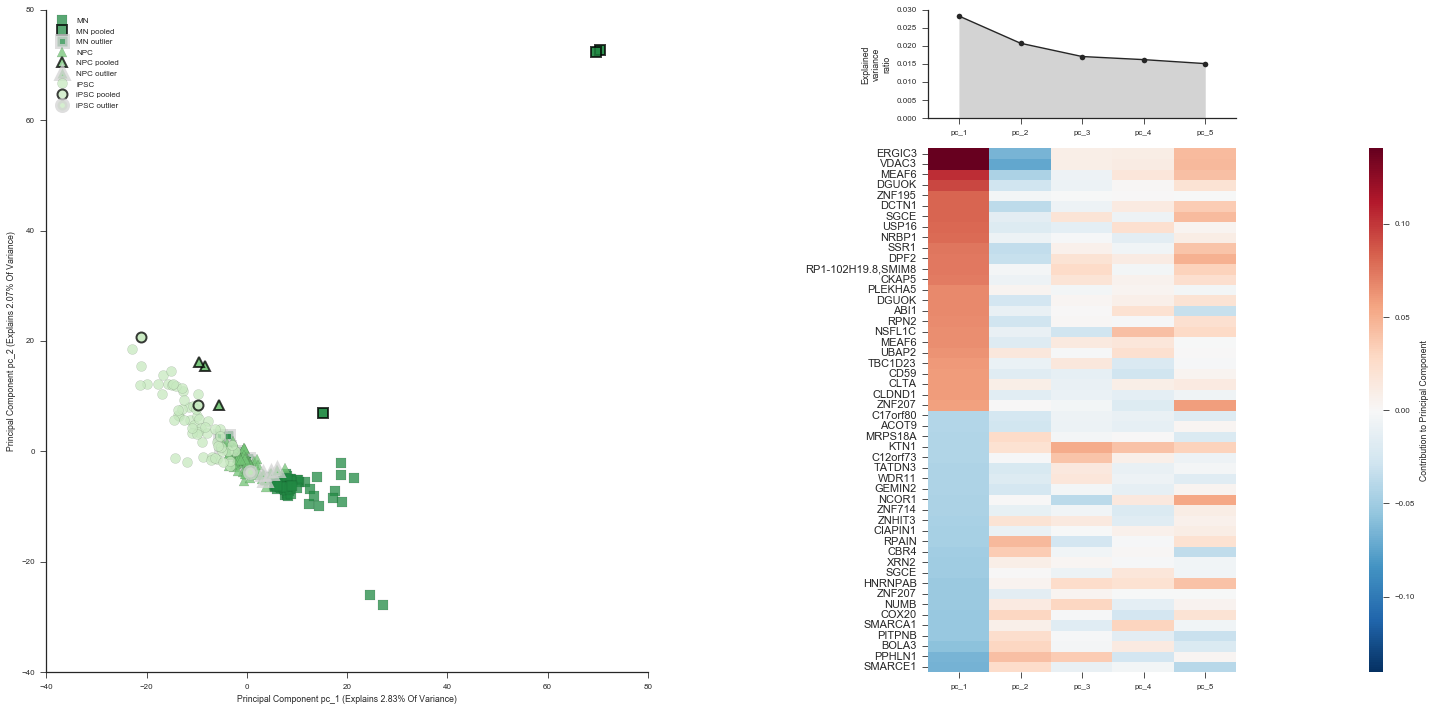

In [17]:
sns.set(style='ticks', context='paper')
pcaviz = study.plot_pca(feature_subset=non_de_event_names, data_type='splicing', show_vectors=False)
pcaviz.fig_reduced.savefig('{}/constitutively_expressed_genes_splicing_pca.pdf'.format(folder))

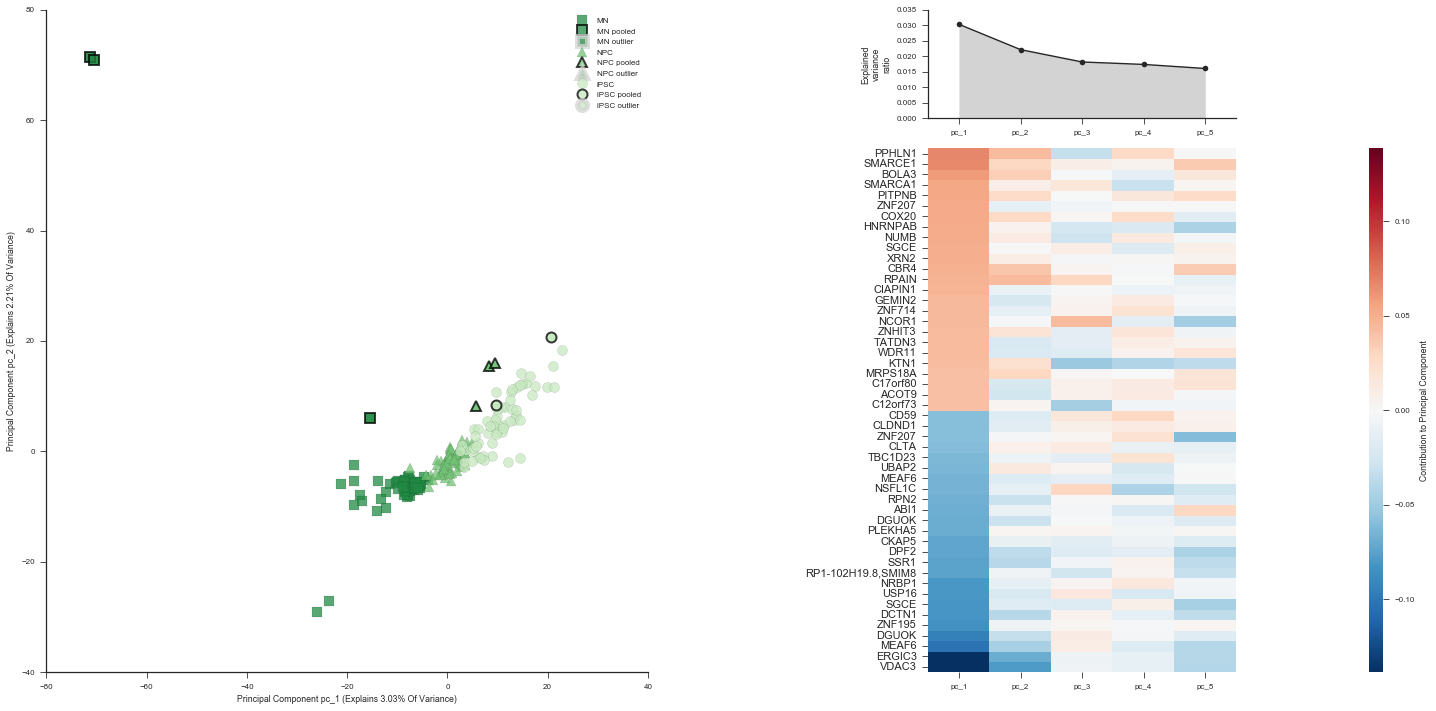

In [18]:
sns.set(style='ticks', context='paper')
pcaviz = study.plot_pca(feature_subset=non_de_event_names, data_type='splicing', show_vectors=False, 
                        sample_subset='~outlier')
pcaviz.fig_reduced.savefig('{}/constitutively_expressed_genes_splicing_pca.pdf'.format(folder))

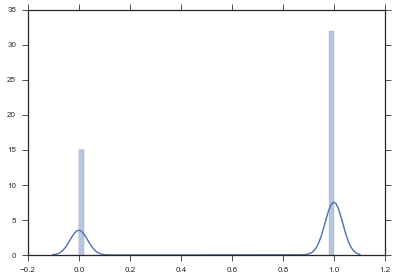

In [19]:
data = study.splicing.data[study.splicing.data.columns.intersection(non_de_event_names)]
sns.distplot(data.values.flat, bins=np.linspace(0, 1, 50), hist_kws=dict(range=(0, 1)))

In [20]:
ord('!')

33

In [21]:
ord('I')

73

In [22]:
chr(33)

'!'

In [23]:
sum(map(ord, 'yan'))

328

In [24]:
data.head()

,exon:chr10:101165513-101165617:-@exon:chr10:101163481-101163631:-@exon:chr10:101163226-101163391:-,exon:chr10:101480744-101480825:-@exon:chr10:101478103-101478257:-@exon:chr10:101476105-101476218:-,exon:chr10:101964263-101964414:-@exon:chr10:101961845-101961906:-@exon:chr10:101960428-101960537:-,exon:chr10:101969352-101969546:-@exon:chr10:101966987-101967089:-@exon:chr10:101964833-101964956:-,exon:chr10:101997779-101997988:-@exon:chr10:101996607-101996726:-@exon:chr10:101995424-101995521:-,exon:chr10:102003455-102003534:-@exon:chr10:101997779-101997988:-@exon:chr10:101996607-101996726:-,exon:chr10:102013178-102013296:-@exon:chr10:102010005-102010089:-@exon:chr10:102006552-102006692:-,exon:chr10:102019975-102020076:-@exon:chr10:102016019-102016233:-@exon:chr10:102013178-102013296:-,exon:chr10:102020723-102020801:-@exon:chr10:102019975-102020076:-@exon:chr10:102013178-102013296:-,exon:chr10:102020723-102020801:-@exon:chr10:102019975-102020076:-@exon:chr10:102016019-102016233:-,...,exon:chrX:138820075-138820228:-@exon:chrX:138819890-138819955:-@exon:chrX:138813810-138813914:-@exon:chrX:138808505-138811121:-,exon:chrX:153363061-153363120:-@exon:chrX:153357642-153357765:-@exon:chrX:153305243-153305354:-@exon:chrX:153297886-153298008:-,exon:chrX:41419032-41419100:-@exon:chrX:41416285-41416353:-@exon:chrX:41414853-41414888:-@exon:chrX:41412972-41413168:-,exon:chrX:47517181-47517262:-@exon:chrX:47516971-47517038:-@exon:chrX:47516582-47516689:-@exon:chrX:47511480-47511543:-,exon:chrX:69674946-69675113:+@exon:chrX:69675637-69675952:+@exon:chrX:69699000-69699114:+@exon:chrX:69711957-69712087:+,exon:chrX:69712371-69712446:+@exon:chrX:69713226-69713325:+@exon:chrX:69715258-69715303:+@exon:chrX:69717030-69717071:+,exon:chrX:69713226-69713325:+@exon:chrX:69715258-69715303:+@exon:chrX:69717030-69717071:+@exon:chrX:69718370-69718420:+,exon:chrX:73164178-73164300:+@exon:chrX:73164419-73164497:+@exon:chrX:73166834-73167209:+@exon:chrX:73214675-73214796:+,exon:chrX:73164419-73164497:+@exon:chrX:73166834-73167209:+@exon:chrX:73214675-73214796:+@exon:chrX:73218603-73218679:+,exon:chrX:83757350-83757487:-@exon:chrX:83743032-83743140:-@exon:chrX:83730259-83730405:-@exon:chrX:83723936-83724583:-
sample_id,,,,,,,,,,,,,,,,,,,,,
CVN_01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CVN_02,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
CVN_03,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CVN_04,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CVN_05,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0


In [26]:
from sklearn.decomposition import FastICA

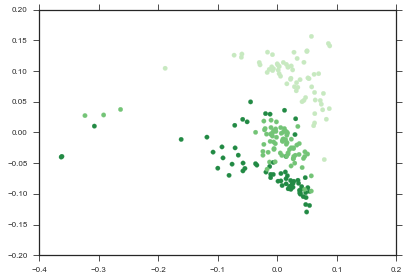

In [27]:
smusher = FastICA(n_components=2)
smushed = pd.DataFrame(smusher.fit_transform(data.fillna(100000)), index=data.index)
smushed.head()

fig, ax = plt.subplots()

color = study.sample_id_to_color[smushed.index]
ax.scatter(smushed[0], smushed[1], color=color)

In [31]:
from sklearn.decomposition import PCA

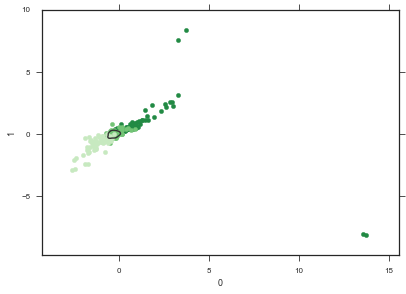

In [32]:
smusher = PCA(n_components=2)
smushed = pd.DataFrame(smusher.fit_transform(data.fillna(data.mean())), index=data.index)
smushed.head()

fig, ax = plt.subplots()

color = study.sample_id_to_color[smushed.index]
for phenotype, df in smushed.groupby(study.sample_id_to_phenotype):
    color = study.phenotype_to_color[phenotype]
    ax.scatter(df[0], df[1], color=color)
    sns.kdeplot(df[0], df[1], color=color, levels=[1], shade_lowest=False)

In [34]:
values = np.arange(0, 1, 0.01)

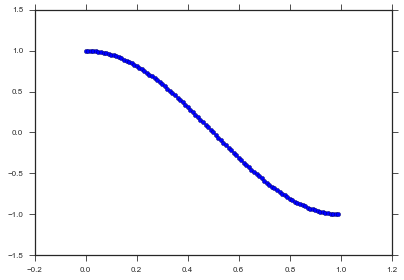

In [35]:
transformed = np.cos(values*np.pi)

fig, ax = plt.subplots()
ax.scatter(values, transformed)

In [36]:
cosined = np.cos(data * np.pi)
cosined.head()

,exon:chr10:101165513-101165617:-@exon:chr10:101163481-101163631:-@exon:chr10:101163226-101163391:-,exon:chr10:101480744-101480825:-@exon:chr10:101478103-101478257:-@exon:chr10:101476105-101476218:-,exon:chr10:101964263-101964414:-@exon:chr10:101961845-101961906:-@exon:chr10:101960428-101960537:-,exon:chr10:101969352-101969546:-@exon:chr10:101966987-101967089:-@exon:chr10:101964833-101964956:-,exon:chr10:101997779-101997988:-@exon:chr10:101996607-101996726:-@exon:chr10:101995424-101995521:-,exon:chr10:102003455-102003534:-@exon:chr10:101997779-101997988:-@exon:chr10:101996607-101996726:-,exon:chr10:102013178-102013296:-@exon:chr10:102010005-102010089:-@exon:chr10:102006552-102006692:-,exon:chr10:102019975-102020076:-@exon:chr10:102016019-102016233:-@exon:chr10:102013178-102013296:-,exon:chr10:102020723-102020801:-@exon:chr10:102019975-102020076:-@exon:chr10:102013178-102013296:-,exon:chr10:102020723-102020801:-@exon:chr10:102019975-102020076:-@exon:chr10:102016019-102016233:-,...,exon:chrX:138820075-138820228:-@exon:chrX:138819890-138819955:-@exon:chrX:138813810-138813914:-@exon:chrX:138808505-138811121:-,exon:chrX:153363061-153363120:-@exon:chrX:153357642-153357765:-@exon:chrX:153305243-153305354:-@exon:chrX:153297886-153298008:-,exon:chrX:41419032-41419100:-@exon:chrX:41416285-41416353:-@exon:chrX:41414853-41414888:-@exon:chrX:41412972-41413168:-,exon:chrX:47517181-47517262:-@exon:chrX:47516971-47517038:-@exon:chrX:47516582-47516689:-@exon:chrX:47511480-47511543:-,exon:chrX:69674946-69675113:+@exon:chrX:69675637-69675952:+@exon:chrX:69699000-69699114:+@exon:chrX:69711957-69712087:+,exon:chrX:69712371-69712446:+@exon:chrX:69713226-69713325:+@exon:chrX:69715258-69715303:+@exon:chrX:69717030-69717071:+,exon:chrX:69713226-69713325:+@exon:chrX:69715258-69715303:+@exon:chrX:69717030-69717071:+@exon:chrX:69718370-69718420:+,exon:chrX:73164178-73164300:+@exon:chrX:73164419-73164497:+@exon:chrX:73166834-73167209:+@exon:chrX:73214675-73214796:+,exon:chrX:73164419-73164497:+@exon:chrX:73166834-73167209:+@exon:chrX:73214675-73214796:+@exon:chrX:73218603-73218679:+,exon:chrX:83757350-83757487:-@exon:chrX:83743032-83743140:-@exon:chrX:83730259-83730405:-@exon:chrX:83723936-83724583:-
sample_id,,,,,,,,,,,,,,,,,,,,,
CVN_01,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CVN_02,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN
CVN_03,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CVN_04,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CVN_05,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,1


In [37]:
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import MDS, TSNE

In [38]:
cosined_fillna = cosined.fillna(0)
cosined_fillna.head()

,exon:chr10:101165513-101165617:-@exon:chr10:101163481-101163631:-@exon:chr10:101163226-101163391:-,exon:chr10:101480744-101480825:-@exon:chr10:101478103-101478257:-@exon:chr10:101476105-101476218:-,exon:chr10:101964263-101964414:-@exon:chr10:101961845-101961906:-@exon:chr10:101960428-101960537:-,exon:chr10:101969352-101969546:-@exon:chr10:101966987-101967089:-@exon:chr10:101964833-101964956:-,exon:chr10:101997779-101997988:-@exon:chr10:101996607-101996726:-@exon:chr10:101995424-101995521:-,exon:chr10:102003455-102003534:-@exon:chr10:101997779-101997988:-@exon:chr10:101996607-101996726:-,exon:chr10:102013178-102013296:-@exon:chr10:102010005-102010089:-@exon:chr10:102006552-102006692:-,exon:chr10:102019975-102020076:-@exon:chr10:102016019-102016233:-@exon:chr10:102013178-102013296:-,exon:chr10:102020723-102020801:-@exon:chr10:102019975-102020076:-@exon:chr10:102013178-102013296:-,exon:chr10:102020723-102020801:-@exon:chr10:102019975-102020076:-@exon:chr10:102016019-102016233:-,...,exon:chrX:138820075-138820228:-@exon:chrX:138819890-138819955:-@exon:chrX:138813810-138813914:-@exon:chrX:138808505-138811121:-,exon:chrX:153363061-153363120:-@exon:chrX:153357642-153357765:-@exon:chrX:153305243-153305354:-@exon:chrX:153297886-153298008:-,exon:chrX:41419032-41419100:-@exon:chrX:41416285-41416353:-@exon:chrX:41414853-41414888:-@exon:chrX:41412972-41413168:-,exon:chrX:47517181-47517262:-@exon:chrX:47516971-47517038:-@exon:chrX:47516582-47516689:-@exon:chrX:47511480-47511543:-,exon:chrX:69674946-69675113:+@exon:chrX:69675637-69675952:+@exon:chrX:69699000-69699114:+@exon:chrX:69711957-69712087:+,exon:chrX:69712371-69712446:+@exon:chrX:69713226-69713325:+@exon:chrX:69715258-69715303:+@exon:chrX:69717030-69717071:+,exon:chrX:69713226-69713325:+@exon:chrX:69715258-69715303:+@exon:chrX:69717030-69717071:+@exon:chrX:69718370-69718420:+,exon:chrX:73164178-73164300:+@exon:chrX:73164419-73164497:+@exon:chrX:73166834-73167209:+@exon:chrX:73214675-73214796:+,exon:chrX:73164419-73164497:+@exon:chrX:73166834-73167209:+@exon:chrX:73214675-73214796:+@exon:chrX:73218603-73218679:+,exon:chrX:83757350-83757487:-@exon:chrX:83743032-83743140:-@exon:chrX:83730259-83730405:-@exon:chrX:83723936-83724583:-
sample_id,,,,,,,,,,,,,,,,,,,,,
CVN_01,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CVN_02,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-1,0,0
CVN_03,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CVN_04,0,0,0,0,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CVN_05,-1,-1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


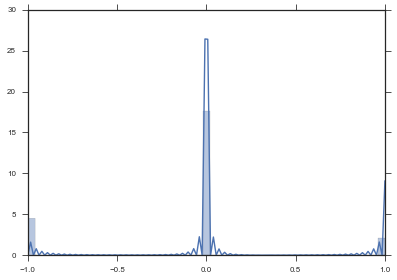

In [39]:
sns.distplot(cosined_fillna.values.flat, bins=np.linspace(-1, 1, 50), hist_kws=dict(range=(-1, 1)))

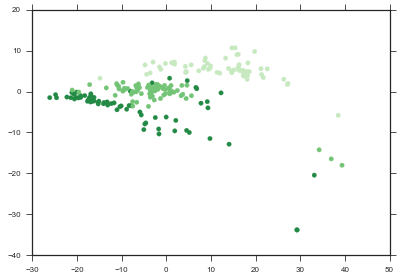

In [40]:
smusher = PCA(n_components=2)
smushed = pd.DataFrame(smusher.fit_transform(cosined_fillna), index=cosined_fillna.index)
smushed.head()

fig, ax = plt.subplots()

color = study.sample_id_to_color[smushed.index]
ax.scatter(smushed[0], smushed[1], color=color)

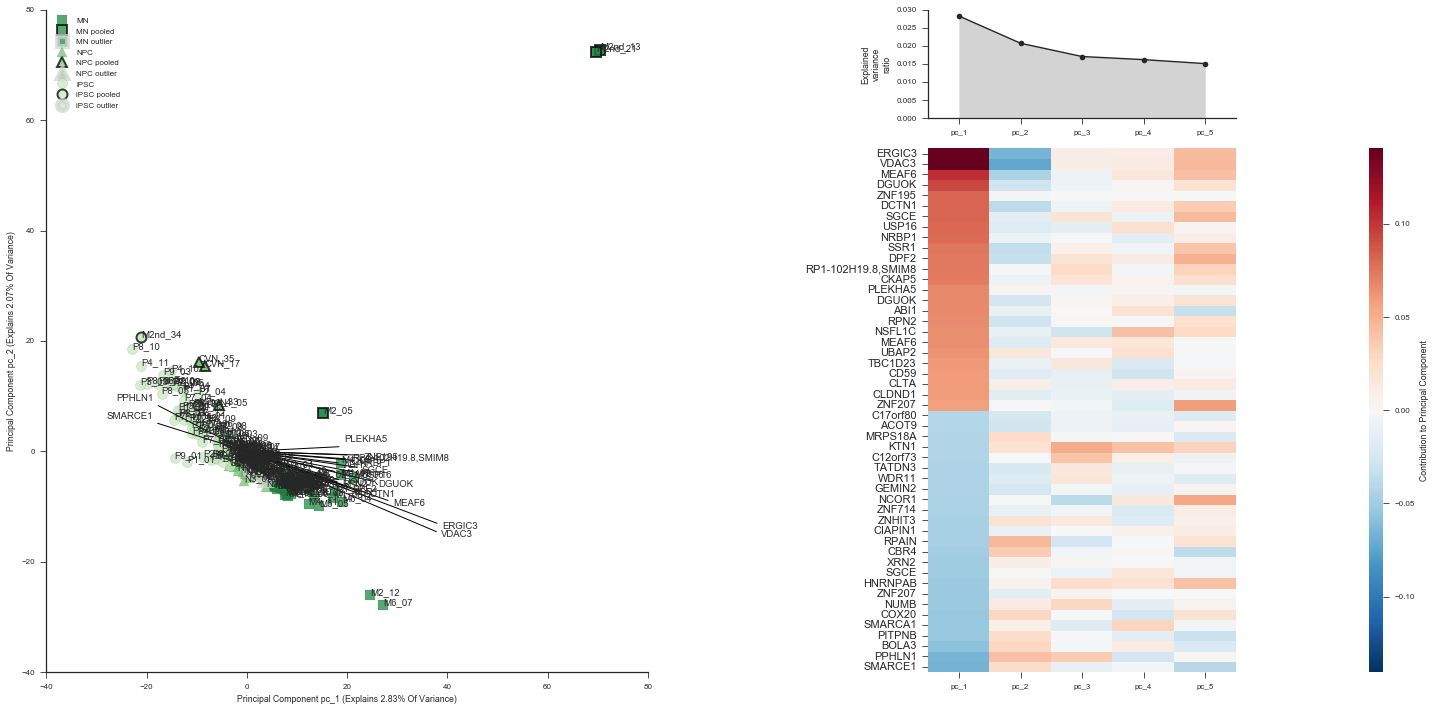

In [41]:
sns.set(style='ticks', context='paper')
study.plot_pca(feature_subset=non_de_event_names, data_type='splicing', show_point_labels=True)

5501


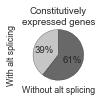

In [42]:
import collections
import itertools

event_per_genes = pd.Series(collections.Counter(itertools.chain(
            *study.splicing.feature_data.ensembl_id[non_de_event_names].map(
        lambda x: x.split(',')))))
# event_per_genes = s.groupby(s).size()
genes_without_splicing_events = pd.Index(non_de_genes).difference(event_per_genes.index)

print len(event_per_genes)

fig, ax = plt.subplots(figsize=(1.5, 1.5))
labels = 'Genes with alternative splice junctions', 'Genes without alternative slpice junctions'
sizes = [len(event_per_genes), len(genes_without_splicing_events)]
# colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
# explode = (0, 0.1, 0, 0) # only "explode" the 2nd slice (i.e. 'Hogs')

ax.pie(sizes, labels=None, colors=sns.color_palette('Greys', n_colors=2),
        autopct='%1.f%%', startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
ax.axis('equal')
ax.set(ylabel='With alt splicing', 
       xlabel='Without alt splicing', title='Constitutively\nexpressed genes')
fig.tight_layout()
fig.savefig('{}/constitutively_expressed_genes_percentage_genes_with_events.pdf'.format(folder))


### Number of splicing events in all expressed genes

5850


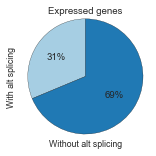

In [43]:
import collections
import itertools

event_per_genes = pd.Series(collections.Counter(itertools.chain(
            *study.splicing.feature_data.ensembl_id[study.splicing.data.columns].map(
        lambda x: x.split(',')))))
# event_per_genes = s.groupby(s).size()
genes_without_splicing_events = study.expression.data.columns.difference(event_per_genes.index)

print len(event_per_genes)

fig, ax = plt.subplots(figsize=(2.25, 2.25))
labels = 'Genes with alternative splice junctions', 'Genes without alternative slpice junctions'
sizes = [len(event_per_genes), len(genes_without_splicing_events)]
# colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
# explode = (0, 0.1, 0, 0) # only "explode" the 2nd slice (i.e. 'Hogs')

ax.pie(sizes, labels=None, colors=sns.color_palette('Paired'),
        autopct='%1.f%%', startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
ax.axis('equal')
ax.set(ylabel='With alt splicing', 
       xlabel='Without alt splicing', title='Expressed genes')
fig.tight_layout()
fig.savefig('{}/percentage_genes_with_events.pdf'.format(folder))


In [44]:
sns.set(style='ticks', context='paper')

                     test_statistic   p_value
group2    group1                             
RBP       All genes       1054745.0  0.000029
          TF                67296.5  0.000033
          lincRNA            9326.5  0.006102
All genes TF              1098341.5  0.159847
          lincRNA          152365.5  0.180711
lincRNA   TF                12098.5  0.410052


/home/obotvinnik/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:45: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


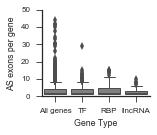

In [45]:
tf_events = event_per_genes[study.expression.feature_subsets['gerstberger2014_tf']].dropna()
rbp_events = event_per_genes[study.expression.feature_subsets['gerstberger2014_rbp_target_mrna']].dropna()
lincrna_events = event_per_genes[study.expression.feature_subsets['transcript_type: lincRNA']].dropna()

all_genes_events = event_per_genes.reset_index()
all_genes_events['Gene Type'] = 'All genes'

tf_events = tf_events.reset_index()
tf_events['Gene Type'] = 'TF'

rbp_events = rbp_events.reset_index()
rbp_events['Gene Type'] = 'RBP'

lincrna_events = lincrna_events.reset_index()
lincrna_events['Gene Type'] = 'lincRNA'

events_per_gene_type = pd.concat([all_genes_events, tf_events, rbp_events, lincrna_events])
events_per_gene_type = events_per_gene_type.rename(columns={0:'AS exons per gene'})

fig, ax = plt.subplots(figsize=(2.25, 2))
sns.boxplot(x='Gene Type', y='AS exons per gene', data=events_per_gene_type, linewidth=1, color='grey')
sns.despine()
ax.locator_params('y', nbins=5)
# ax.set_ylim(0, 100)

from scipy.stats import mannwhitneyu
import itertools

grouped = events_per_gene_type.groupby('Gene Type')
groups = grouped.groups.keys()

comparisons = itertools.combinations(groups, 2)

col = 'AS exons per gene'

results = []
for group1, group2 in comparisons:
    test_statistic, p_value = mannwhitneyu(grouped.get_group(group1)[col], grouped.get_group(group2)[col])
    results.append([group1, group2, test_statistic, p_value])

columns = ['group1', 'group2', 'test_statistic', 'p_value']

mannwhitney_results = pd.DataFrame(results, columns=columns)
mannwhitney_results = mannwhitney_results.set_index(['group2', 'group1']).sort_index()
print mannwhitney_results.sort('p_value')
# ## Know that RBP-everything else is significant, so plot those
# others = ('All genes', 'TF', 'lincRNA')
# xticklabels = [x.get_text() for x in ax.get_xticklabels()]
# rbp_i = xticklabels.index('RBP')

# ymax = grouped[col].max().max()

# offset = 0
# yrange = ymax - grouped[col].min().min()
# offset_interval = yrange*0.1
# for i, other in enumerate(others):
#     offset = offset_interval*(i+1)
#     other_i = xticklabels.index(other)
#     ax.annotate("", xy=(rbp_i, ymax+offset), xycoords='data',
#                xytext=(other_i, ymax+offset), textcoords='data',
#                arrowprops=dict(arrowstyle="-", ec='#444444',
#                                connectionstyle="bar,fraction=0.08"))
#     middle = abs((rbp_i + other_i)/2.)
#     ax.text(middle, ymax + offset, '***',
#            horizontalalignment='center',
#            verticalalignment='center', fontsize=16)
# ax.set(xlabel='*** $p<10^{-10}$')
fig.tight_layout()
fig.savefig('{}/splicing_events_per_gene.pdf'.format(folder))

## Lavalamp plots

In [46]:
study.splicing.data.shape

(204, 16360)

In [47]:
singles_no_outliers = study.splicing.singles.index.difference(study.splicing.outliers.index)
print len(singles_no_outliers)

splicing_singles = study.splicing.data.loc[singles_no_outliers]
splicing_singles_count = splicing_singles.groupby(study.sample_id_to_phenotype).count()
ten_per_celltype = (splicing_singles_count >= 10).any(axis=0)
splicing10 = study.splicing.data[ten_per_celltype[ten_per_celltype].index]
print splicing10.shape

181
(204, 12894)


In [48]:
sns.set(context='paper', style='ticks')

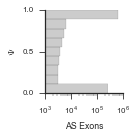

In [49]:
fig, ax = plt.subplots(figsize=(2, 2))
plt.xscale('log', nonposx='clip')
sns.distplot(splicing10.values.flat, bins=np.linspace(0, 1,10), color='grey', kde=False, vertical=True, 
             hist_kws=dict(range=(0, 1)))
ax.set(yticks=(0, 0.5, 1), ylabel='$\Psi$', xlabel='AS Exons')
sns.despine()
fig.tight_layout()
fig.savefig('{}/splicing10_per_celltype_distplot.pdf'.format(folder))

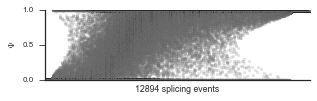

In [50]:
fig, ax = plt.subplots(figsize=(4.5, 1.5))
flotilla.visualize.splicing.lavalamp(splicing10, color='grey', ax=ax, markersize=3)
# fig = plt.gcf()
fig.tight_layout()
fig.savefig('{}/splicing10_per_celltype_lavalamp_all.png'.format(folder), dpi=600)

In [54]:
pooled = study.splicing.pooled
print(pooled.shape)
pooled

(8, 16360)


,exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100189330-100189399:-,exon:chr10:100193697-100193848:-@exon:chr10:100190888-100191048:-@exon:chr10:100190328-100190427:-,exon:chr10:100195392-100195529:-@exon:chr10:100195029-100195171:-@exon:chr10:100193697-100193848:-,exon:chr10:101165513-101165617:-@exon:chr10:101163481-101163631:-@exon:chr10:101163226-101163391:-,exon:chr10:101480744-101480825:-@exon:chr10:101478103-101478257:-@exon:chr10:101476105-101476218:-,exon:chr10:101507014-101507147:+@exon:chr10:101510126-101510153:+@exon:chr10:101514286-101514391:+,exon:chr10:101507014-101507147:+@exon:chr10:101514286-101514391:+@exon:chr10:101515382-101515465:+,exon:chr10:101964263-101964414:-@exon:chr10:101961845-101961906:-@exon:chr10:101960428-101960537:-,exon:chr10:101969352-101969546:-@exon:chr10:101966987-101967089:-@exon:chr10:101964833-101964956:-,exon:chr10:101997779-101997988:-@exon:chr10:101996607-101996726:-@exon:chr10:101995424-101995521:-,...,exon:chrY:21903204-21903374:-@exon:chrY:21901414-21901548:-@exon:chrY:21897507-21897636:-,exon:chrY:21903621-21903743:-@exon:chrY:21903204-21903374:-@exon:chrY:21901414-21901548:-,exon:chrY:22744476-22744579:+@exon:chrY:22746360-22746410:+@exon:chrY:22749910-22749991:+,exon:chrY:2709527-2709668:+@exon:chrY:2710206-2710283:+@exon:chrY:2712118-2712298:+,exon:chrY:2710206-2710283:+@exon:chrY:2712118-2712298:+@exon:chrY:2713687-2713784:+,exon:chrY:2712118-2712298:+@exon:chrY:2713687-2713784:+@exon:chrY:2722641-2722812:+,exon:chrY:2713687-2713784:+@exon:chrY:2722641-2722812:+@exon:chrY:2733129-2733286:+,exon:chrY:2722641-2722812:+@exon:chrY:2733129-2733286:+@exon:chrY:2734834-2734903:+,exon:chrY:2821950-2822038:+@exon:chrY:2829115-2829687:+@exon:chrY:2843136-2843285:+,exon:chrY:2843552-2843695:+@exon:chrY:2844711-2844863:+@exon:chrY:2845981-2846121:+
CVN_17,NaN,NaN,NaN,1.00000,1.000000,0.777778,1.000000,NaN,NaN,1,...,NaN,NaN,0.929078,1.00000,1,1,1,1.000000,NaN,NaN
CVN_35,1,NaN,1,1.00000,1.000000,0.246753,1.000000,1,NaN,1,...,NaN,NaN,1.000000,1.00000,1,1,1,1.000000,NaN,NaN
M2_05,NaN,NaN,NaN,0.87156,NaN,0.666667,0.864865,1,NaN,1,...,NaN,NaN,0.885714,1.00000,1,1,1,1.000000,NaN,NaN
M2nd_13,NaN,NaN,NaN,1.00000,1.000000,0.151832,1.000000,NaN,NaN,1,...,NaN,NaN,1.000000,1.00000,1,1,1,1.000000,1,1
M2nd_21,NaN,NaN,NaN,1.00000,1.000000,0.376344,1.000000,NaN,NaN,1,...,1,1,1.000000,1.00000,1,1,1,1.000000,1,1
M2nd_33,NaN,NaN,NaN,NaN,1.000000,0.781250,1.000000,NaN,NaN,1,...,NaN,NaN,1.000000,1.00000,1,1,1,1.000000,NaN,NaN
M2nd_34,0,NaN,NaN,1.00000,0.714286,0.757848,0.911765,NaN,NaN,1,...,NaN,NaN,1.000000,0.99336,1,1,1,0.991952,NaN,NaN
N4_05,NaN,NaN,NaN,1.00000,1.000000,0.547170,1.000000,1,NaN,NaN,...,NaN,NaN,1.000000,1.00000,1,1,1,1.000000,NaN,NaN


In [56]:
cosine_order = flotilla.visualize.splicing.get_switchy_score_order(splicing10)
cosine_order

array([ 2593,  2893, 10790, ..., 10135,  5778,  5931])

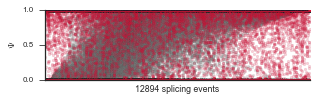

In [59]:
fig, ax = plt.subplots(figsize=(4.5, 1.5))
flotilla.visualize.splicing.lavalamp(splicing10, color='grey', ax=ax, markersize=3)
flotilla.visualize.splicing.lavalamp(pooled, color='crimson', ax=ax, markersize=3, switchy_score_psi=splicing10)
fig.tight_layout()

In [60]:
study.splicing.maybe_renamed_to_feature_id('ENAH')

Index([u'exon:chr1:225695653-225695719:-@exon:chr1:225692693-225692755:-@exon:chr1:225688694-225688772:-'], dtype='object')

In [ ]:
flotilla.visualize.splicing.lavalamp_pooled_inconsistent(splicing10)

In [51]:
sns.set(context='paper', style='ticks')

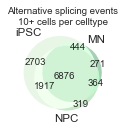

In [52]:
import matplotlib_venn

events_per_phenotype = dict((name, set(df.dropna(thresh=10, axis=1).dropna(how='all',axis=0).columns))
                            for name, df in splicing10.groupby(study.sample_id_to_phenotype))
events_per_phenotype_count = pd.Series(events_per_phenotype).map(len)

phenotypes, events = zip(*events_per_phenotype.items())

fig, ax = plt.subplots(figsize=(1.8, 1.8))
matplotlib_venn.venn3(events, set_labels=phenotypes, 
                      set_colors=[study.phenotype_to_color[p] for p in phenotypes])
ax = plt.gca()
ax.set_title('Alternative splicing events\n10+ cells per celltype')
fig = plt.gcf()
fig.tight_layout()
fig.savefig('{}/shared_events_venn10_per_phenotype.pdf'.format(folder))

In [53]:
events_per_phenotype_count

MN       7955
NPC      9476
iPSC    11940
dtype: int64